<a href="https://colab.research.google.com/github/YuF-0115/my_research/blob/main/AUC_%26_PIMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd drive/My Drive/研究用

/content/drive/My Drive/研究用


In [ ]:
import keras
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense
import pandas as pd
import numpy as np
from keras import regularizers
import tensorflow as tf
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score

#誤差と重みの二乗の線形結合を最小化する

from keras import backend as K

#n1 = インプットの数
def bayes_regularization1(weight_matrix):
    return alpha*(1/n1)*K.sum(K.abs(weight_matrix)**2)

#n2 = 10(unit)
def bayes_regularization2(weight_matrix):
    return alpha*(1/n2)*K.sum(K.abs(weight_matrix)**2)

#損失関数
def custom_loss(y_test, y_pred):
    return (1/batch_size) * K.sum(K.square(y_pred-y_test))

In [ ]:
#Vieira
batch_size = 30
alpha=0.01
n1=7
n2 = 10
beta = 0.01
epochs = 20

def base_model():
    model = Sequential()
    model.add(Dense(units=10, activation='relu', input_dim=7,kernel_regularizer=bayes_regularization1))
    model.add(Dense(units=10, activation='relu',kernel_regularizer=bayes_regularization2))
    model.add(Dense(units=10, activation='relu',kernel_regularizer=bayes_regularization2))
    model.add(Dense(units=1, activation="sigmoid"))
    model.compile(loss=custom_loss,optimizer=Adam(lr=1e-4))
    return model

In [ ]:
df = pd.read_excel("Vieira.xlsx").astype(np.float32)
X = df.iloc[:,0:7]
y = df.iloc[:,[7]]

ms = MinMaxScaler()
X = ms.fit_transform(X)

auc_array = np.empty(1000)
print(len(auc_array))

1000


### Vieira AUC

In [ ]:
from sklearn import metrics

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, shuffle=True,random_state=0)

model = base_model()
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
y_pred = model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)

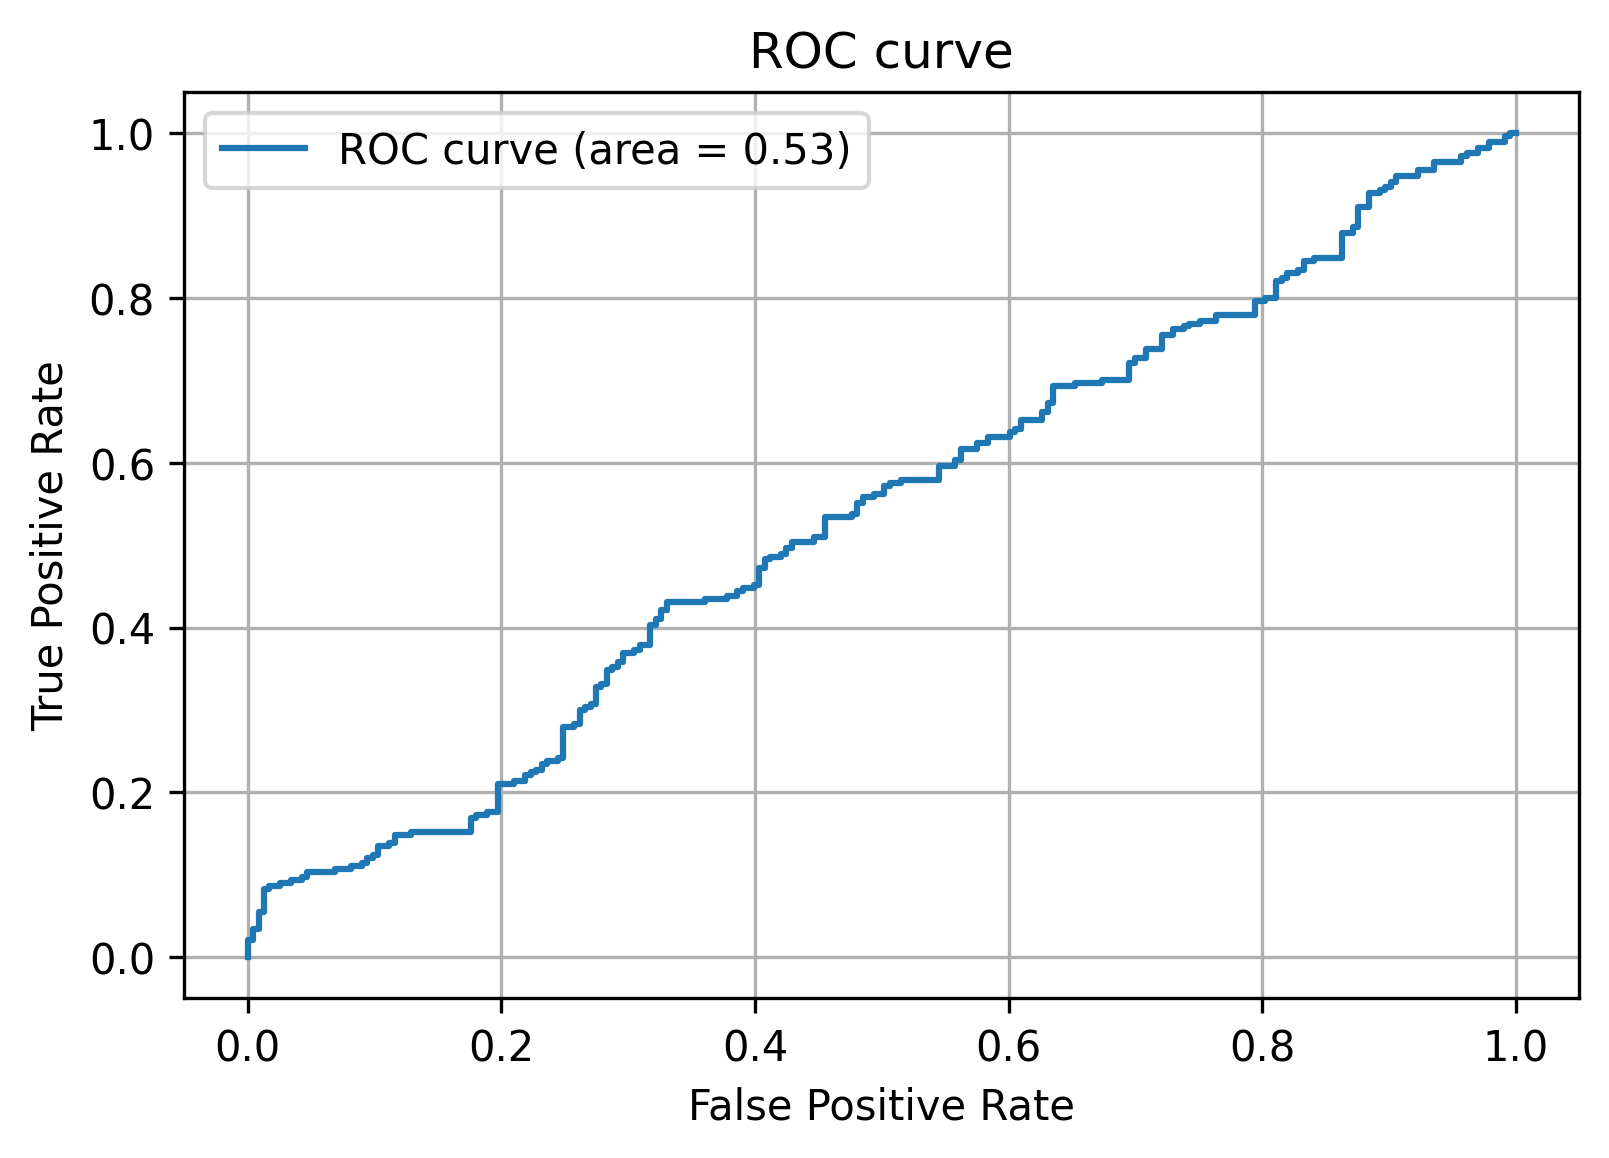

In [ ]:
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, shuffle=True,random_state=0)

for i in range(1000):
    model = base_model()
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    y_pred = model.predict(X_test)
    a = roc_auc_score(y_test, y_pred)
    auc_array[i] = a

In [ ]:
#リストをDataFrame形式に変換, excelに描写
auc_array = pd.Series(auc_array)

auc_array.to_excel("Vieira(AUC).xlsx",index=False)

In [ ]:
import gc
del auc_array
gc.collect()

### 本研究AUC

In [ ]:
#本研究
batch_size = 30
alpha=0.01
n1=31
n2 = 10
beta = 0.01
epochs = 20

def base_model():
    model = Sequential()
    model.add(Dense(units=10, activation='relu', input_dim=31,kernel_regularizer=bayes_regularization1))
    model.add(Dense(units=10, activation='relu',kernel_regularizer=bayes_regularization2))
    model.add(Dense(units=10, activation='relu',kernel_regularizer=bayes_regularization2))
    model.add(Dense(units=1, activation="sigmoid"))
    model.compile(loss=custom_loss,optimizer=Adam(lr=1e-4))
    return model

In [ ]:
#df = pd.read_excel("本研究.xlsx").astype(np.float32)
df = pd.read_excel("本研究.xlsx").astype(np.float32)
X = df.iloc[:,0:31]
y = df.iloc[:,[31]]

ms = MinMaxScaler()
X = ms.fit_transform(X)

auc_array = np.empty(1000)
print(len(auc_array))

1000


In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, shuffle=True,random_state=0)

model = base_model()
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
y_pred = model.predict(X_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_pred)
auc2 = metrics.auc(fpr, tpr)

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, shuffle=True,random_state=0)

for i in range(1000):
    model = base_model()
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    y_pred = model.predict(X_test)
    a = roc_auc_score(y_test, y_pred)
    auc_array[i] = a

ストリーミング出力は最後の 5000 行に切り捨てられました。
1567/1567 [==============================] - 0s 158us/step - loss: 0.2704
Epoch 2/20
1567/1567 [==============================] - 0s 83us/step - loss: 0.2689
Epoch 3/20
1567/1567 [==============================] - 0s 84us/step - loss: 0.2674
Epoch 4/20
1567/1567 [==============================] - 0s 83us/step - loss: 0.2657
Epoch 5/20
1567/1567 [==============================] - 0s 85us/step - loss: 0.2640
Epoch 6/20
1567/1567 [==============================] - 0s 82us/step - loss: 0.2622
Epoch 7/20
1567/1567 [==============================] - 0s 83us/step - loss: 0.2604
Epoch 8/20
1567/1567 [==============================] - 0s 91us/step - loss: 0.2586
Epoch 9/20
1567/1567 [==============================] - 0s 89us/step - loss: 0.2571
Epoch 10/20
1567/1567 [==============================] - 0s 83us/step - loss: 0.2554
Epoch 11/20
1567/1567 [==============================] - 0s 83us/step - loss: 0.2538
Epoch 12/20
1567/1567 [=============================

In [ ]:
#リストをDataFrame形式に変換, excelに描写
auc_array = pd.Series(auc_array)

auc_array.to_excel("本研究エントロピー0,1(AUC).xlsx",index=False)

In [ ]:
import gc
del auc_array
gc.collect()

### 新見 AUC

In [ ]:
#本研究
batch_size = 30
alpha=0.01
n1=29
n2 = 10
beta = 0.01
epochs = 20

def base_model():
    model = Sequential()
    model.add(Dense(units=10, activation='relu', input_dim=29,kernel_regularizer=bayes_regularization1))
    model.add(Dense(units=10, activation='relu',kernel_regularizer=bayes_regularization2))
    model.add(Dense(units=10, activation='relu',kernel_regularizer=bayes_regularization2))
    model.add(Dense(units=1, activation="sigmoid"))
    model.compile(loss=custom_loss,optimizer=Adam(lr=1e-4))
    return model

In [ ]:
#df = pd.read_excel("本研究.xlsx").astype(np.float32)
df = pd.read_excel("新見.xlsx").astype(np.float32)
X = df.iloc[:,0:29]
y = df.iloc[:,[29]]

ms = MinMaxScaler()
X = ms.fit_transform(X)

auc_array = np.empty(1000)
print(len(auc_array))

1000


In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, shuffle=True,random_state=0)

for i in range(1000):
    model = base_model()
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    y_pred = model.predict(X_test)
    a = roc_auc_score(y_test, y_pred)
    auc_array[i] = a

In [ ]:
#リストをDataFrame形式に変換, excelに描写
auc_array = pd.Series(auc_array)

auc_array.to_excel("新見(AUC).xlsx",index=False)

In [ ]:
import gc
del auc_array
gc.collect()

154418

### 本研究 PIMP

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
#本研究
#df = pd.read_excel("本研究.xlsx").astype(np.float32)
df = pd.read_excel("本研究(エントロピーを0,1に).xlsx").astype(np.float32)
X = df.iloc[:,0:31]
y = df.iloc[:,[31]]

ms = MinMaxScaler()
X = ms.fit_transform(X)

X2 = pd.DataFrame(X)

batch_size = 30
alpha=0.01
n1=31
n2 = 10
beta = 0.01
epochs = 20

def base_model():
    model = Sequential()
    model.add(Dense(units=10, activation='relu', input_dim=31,kernel_regularizer=bayes_regularization1))
    model.add(Dense(units=10, activation='relu',kernel_regularizer=bayes_regularization2))
    model.add(Dense(units=10, activation='relu',kernel_regularizer=bayes_regularization2))
    model.add(Dense(units=1, activation="sigmoid"))
    model.compile(loss=custom_loss,optimizer=Adam(lr=1e-4), metrics=['accuracy'])
    return model

In [ ]:
#test...微弱すぎんか？値が
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=0)

#verbose=0でログを表示しない

auc_scorer = make_scorer(roc_auc_score)

perm_imp_list = []

for i in range(100):
    my_model = KerasClassifier(build_fn=base_model, epochs=epochs, batch_size=batch_size, verbose=0)    
    my_model.fit(X_train,y_train)
    result = permutation_importance(my_model, X_train, y_train, scoring=auc_scorer, random_state=71)
    i = pd.DataFrame({"importances_mean":result["importances_mean"], "importances_std":result["importances_std"]}, index=X2.columns)
    perm_imp_list.append(i)

KeyboardInterrupt: ignored

In [ ]:
b = pd.DataFrame()

for i in range(10):
    a = pd.DataFrame(perm_imp_list[i])
    b = pd.concat([a,b],axis=1)

b = b["importances_mean"]
c = b.mean(axis='columns')

In [ ]:
df2 = df.iloc[:,0:31]
c.index = df2.columns
test = c.sort_values(ascending=True)
test

,importances_mean,importances_std
6/1~9/30,-0.000973,0.000734
2月比率,-0.000790,0.000565
性別,-0.000748,0.000703
週末昼,-0.000737,0.001076
セッションPV数,-0.000694,0.000187
平日夜,-0.000296,0.000919
1/1~5/31,-0.000144,0.000365
10/1~12/31,-0.000086,0.000223
7月比率,-0.000077,0.000418
平日昼,-0.000060,0.000253


In [ ]:
test.to_excel("Permutation Importance(エントロピー0,1).xlsx")

In [ ]:
#受注数量合計消し
df = pd.read_excel("本研究.xlsx").astype(np.float32)
df = df.drop("受注数量合計", axis=1)
X = df.iloc[:,0:30]
y = df.iloc[:,[30]]

ms = MinMaxScaler()
X = ms.fit_transform(X)

X2 = pd.DataFrame(X)

batch_size = 30
alpha=0.01
n1=30
n2 = 10
beta = 0.01
epochs = 20

def base_model():
    model = Sequential()
    model.add(Dense(units=10, activation='relu', input_dim=30,kernel_regularizer=bayes_regularization1))
    model.add(Dense(units=10, activation='relu',kernel_regularizer=bayes_regularization2))
    model.add(Dense(units=10, activation='relu',kernel_regularizer=bayes_regularization2))
    model.add(Dense(units=1, activation="sigmoid"))
    model.compile(loss=custom_loss,optimizer=Adam(lr=1e-4), metrics=['accuracy'])
    return model

In [ ]:
#test...微弱すぎんか？値が
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=0)

#verbose=0でログを表示しない
my_model = KerasClassifier(build_fn=base_model, epochs=epochs, batch_size=batch_size, verbose=0)    
my_model.fit(X_train,y_train)

auc_scorer = make_scorer(roc_auc_score)

perm_imp_list = []
result = permutation_importance(my_model, X_train, y_train, scoring=auc_scorer, n_repeats=10, random_state=71)
perm_imp_df = pd.DataFrame({"importances_mean":result["importances_mean"], "importances_std":result["importances_std"]}, index=X2.columns)
perm_imp_list += [perm_imp_df]

In [ ]:
df2 = df.iloc[:,0:31]
perm_imp_df.index = df2.columns
perm_imp_df.sort_values("importances_mean", ascending=True)

,importances_mean,importances_std
3月比率,-1.558717e-03,0.001110
6/1~9/30,-8.144360e-04,0.000624
10/1~12/31,-7.607496e-04,0.000488
1/1~5/31,-6.854075e-04,0.000563
性別,-4.717323e-04,0.000674
11月比率,-3.870856e-04,0.000517
年齢,-2.755957e-04,0.000618
週末昼,-1.734104e-04,0.000265
週末夕,-1.734104e-04,0.000265
平日夜,-1.156069e-04,0.000231


In [ ]:
corr_mat = df2.corr(method='pearson')
corr_mat.to_excel("test1.xlsx")

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=0)

my_model = KerasClassifier(build_fn=base_model, epochs=epochs, batch_size=batch_size)    
my_model.fit(X_train,y_train)

auc_scorer = make_scorer(roc_auc_score)
result = permutation_importance(my_model, X_train, y_train, scoring=auc_scorer, n_repeats=10, random_state=71)
a = result.importances

Epoch 1/20
1567/1567 [==============================] - 0s 196us/step - loss: 0.2721
Epoch 2/20
1567/1567 [==============================] - 0s 123us/step - loss: 0.2709
Epoch 3/20
1567/1567 [==============================] - 0s 124us/step - loss: 0.2697
Epoch 4/20
1567/1567 [==============================] - 0s 123us/step - loss: 0.2686
Epoch 5/20
1567/1567 [==============================] - 0s 119us/step - loss: 0.2674
Epoch 6/20
1567/1567 [==============================] - 0s 121us/step - loss: 0.2663
Epoch 7/20
1567/1567 [==============================] - 0s 122us/step - loss: 0.2654
Epoch 8/20
1567/1567 [==============================] - 0s 122us/step - loss: 0.2643
Epoch 9/20
1567/1567 [==============================] - 0s 120us/step - loss: 0.2632
Epoch 10/20
1567/1567 [==============================] - 0s 125us/step - loss: 0.2624
Epoch 11/20
1567/1567 [==============================] - 0s 118us/step - loss: 0.2612
Epoch 12/20
1567/1567 [==============================] - 0s 122

In [ ]:
a = pd.DataFrame(a)
df2 = df.iloc[:,0:31]
a.index = df2.columns
a.to_excel("test1.xlsx")

学校のやつ(テスト)

In [ ]:
#本研究
#df = pd.read_excel("本研究.xlsx").astype(np.float32)
df = pd.read_excel("本研究(エントロピーを0,1に).xlsx").astype(np.float32)
X = df.iloc[:,0:31]
y = df.iloc[:,[31]]

ms = MinMaxScaler()
X = ms.fit_transform(X)

X2 = pd.DataFrame(X)

batch_size = 30
alpha=0.01
n1=31
n2 = 10
beta = 0.01
epochs = 20


model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=31,kernel_regularizer=bayes_regularization1))
model.add(Dense(units=10, activation='relu',kernel_regularizer=bayes_regularization2))
model.add(Dense(units=10, activation='relu',kernel_regularizer=bayes_regularization2))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(loss=custom_loss,optimizer=Adam(lr=1e-4), metrics=['accuracy'])

auc_scorer = make_scorer(roc_auc_score)

kara = pd.DataFrame()

for j in range(10):
    model.fit(X_train, y_train, epochs=20, batch_size=batch_size,verbose=0)
    y_pred = model.predict(X_test)
    result = permutation_importance(model, X_train, y_train, scoring=auc_scorer,n_repeats=10, random_state=71)
    j = pd.DataFrame(result["importances_mean"])
    kara = pd.concat([kara, j], axis=1)

In [ ]:
df2 = df.iloc[:,0:31]
kara.index = df2.columns
kara.to_excel("test.xlsx")

In [ ]:
from sklearn import metrics

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, shuffle=True,random_state=0)

model = base_model()
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
y_pred = model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)

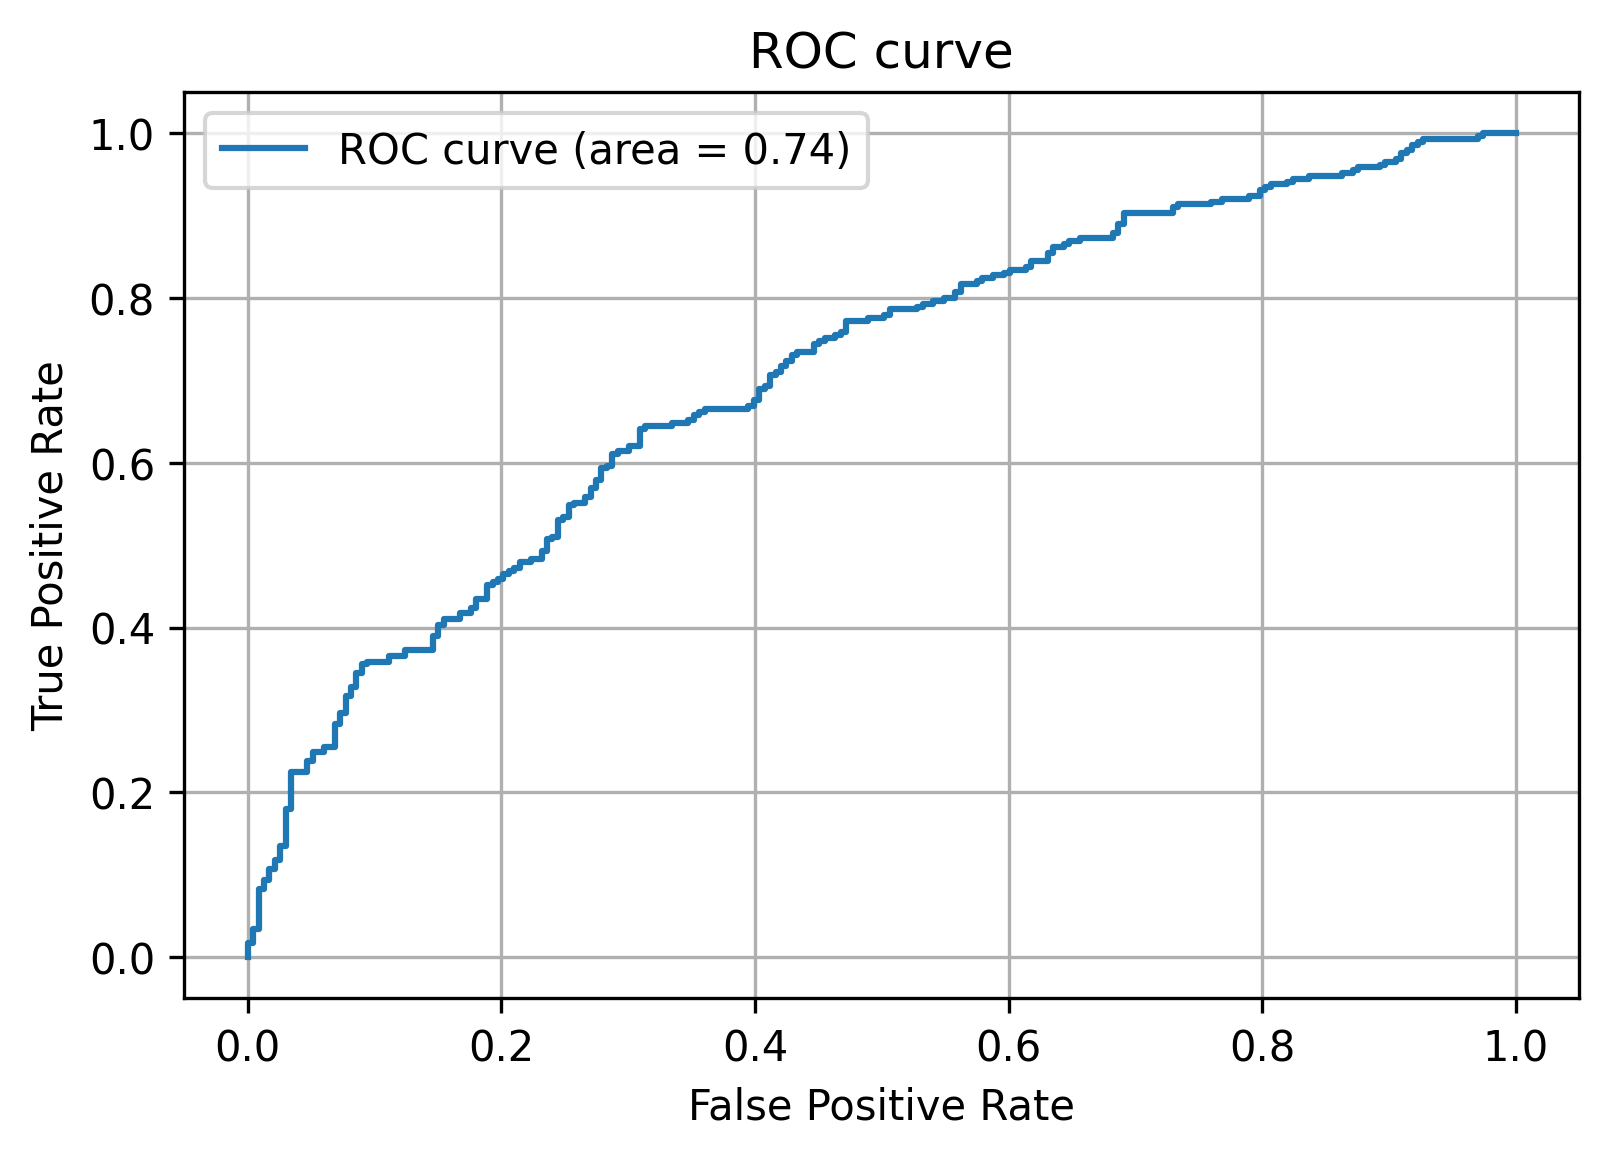

In [ ]:
plt.plot(fpr2, tpr2, label='ROC curve (area = %.2f)'%auc2)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

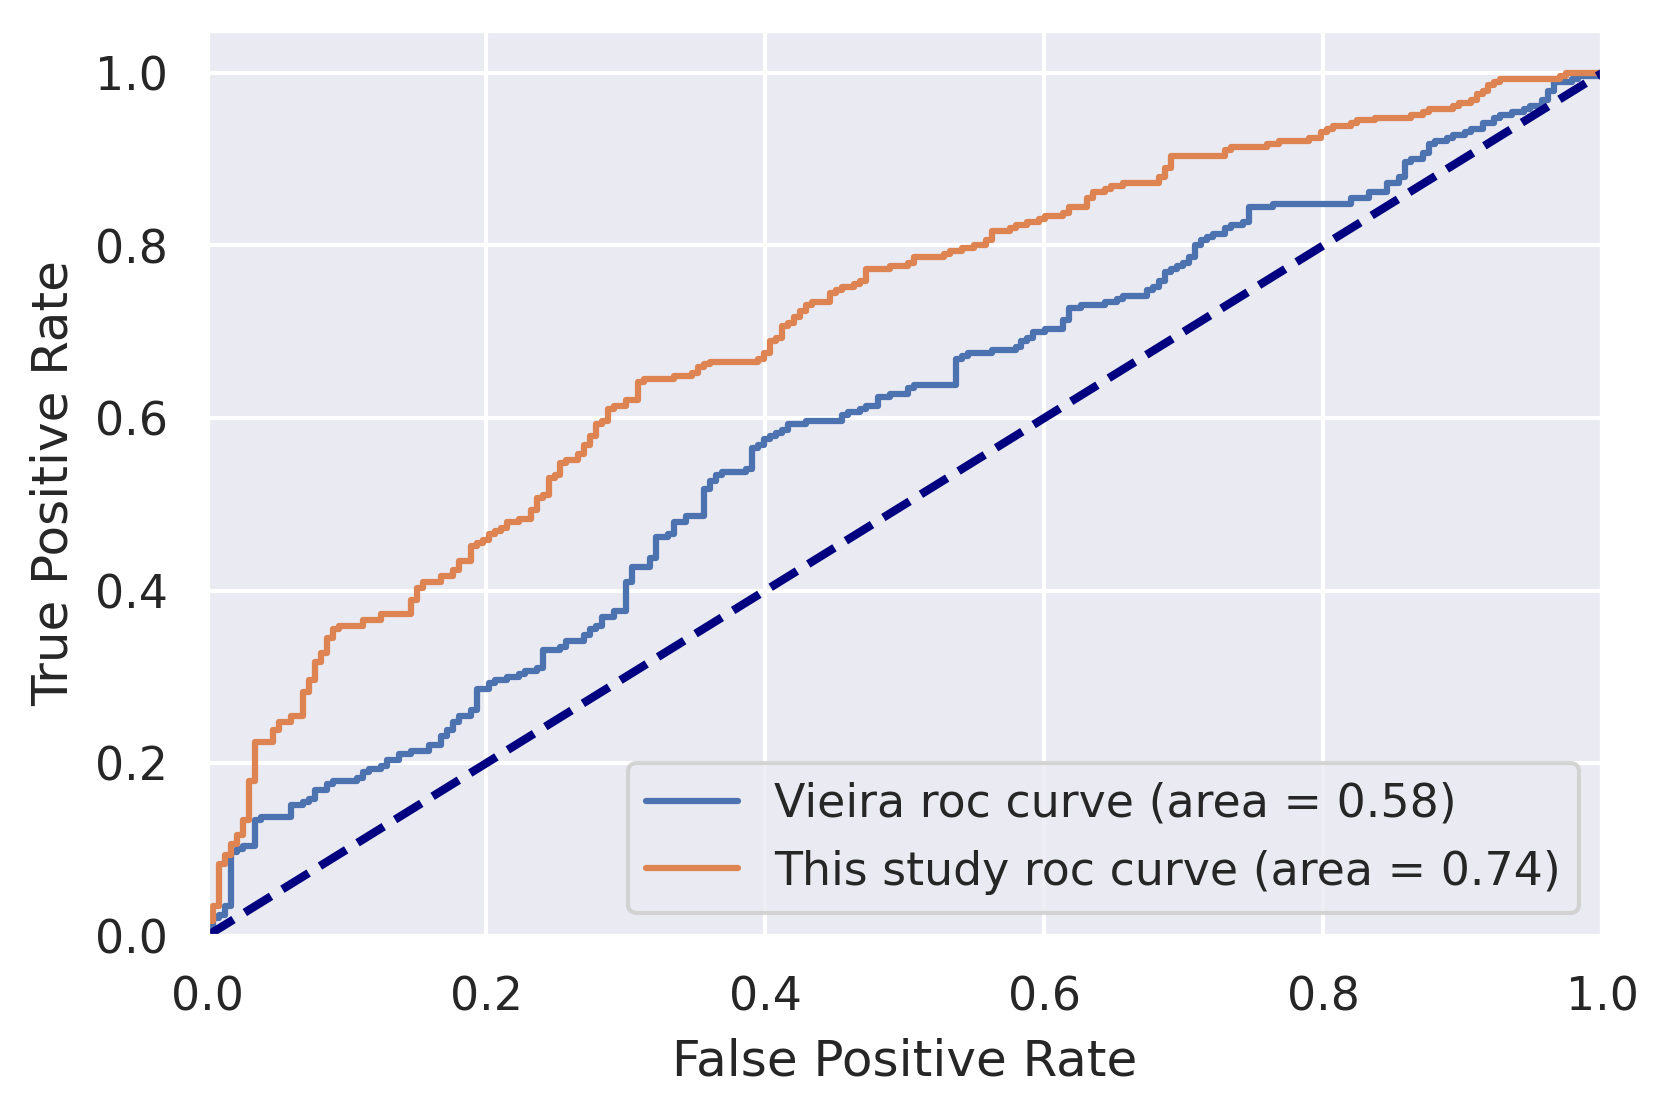

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rcParams ['savefig.dpi'] = 300
plt.rcParams ['figure.dpi'] = 300 #resolution
plt.figure()

# linewidth
lw = 2
plt.plot(fpr, tpr, label='Vieira roc curve (area = %.2f)'%auc)
plt.plot(fpr2, tpr2, label='This study roc curve (area = %.2f)'%auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig("Save Plot as PDF file using savefig2.pdf")
plt.show()